# <center> Linear Discriminant Analysis </center>
---

## Introduction

Linear Discriminant Analysis (LDA) is a dimensionality reduction technique. As the name implies dimensionality reduction techniques reduce the number of dimensions (i.e. variables) in a dataset while retaining as much information as possible.

Linear Discriminant Analysis, or LDA, uses the information from all features to create a new axis and projects the data on the new axis in such a way as to minimizes the variance and maximizes the distance between the means of the two classes.

## Example Problem 

### This example problem shows the direction of PCA and LDA vectors

In [40]:
import numpy as np
import matplotlib.pyplot as plt

In [41]:
X1 = [[1,1],[2,2],[3,3],[5,4],[4,5],[6,6],[8,7]]
X2 = [[-2,3],[-1,4],[1,5],[3,6],[4,7],[2,8],[5,9]]

In [3]:
# X1 = [[1.5,1.5],[2.5,2.5],[3.5,3.5],[5.5,4.5],[4.5,5.5],[6.5,6.5],[8.5,7.5]]
# X2 = [[-2.5,3.5],[-1.5,4.5],[1.5,5.5],[3.5,6.5],[4.5,7.5],[2.5,8.5],[5.5,9.5]]

In [42]:
X1 = np.array(X1)
X2 = np.array(X2)
print(X1.shape,X2.shape)

(7, 2) (7, 2)


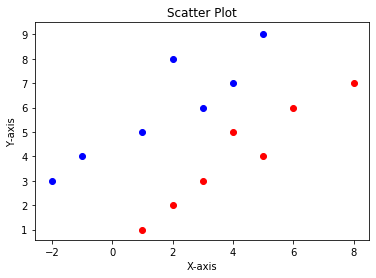

In [43]:
plt.figure()
plt.title("Scatter Plot")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.scatter(X1[:,0],X1[:,1],c='r')
plt.scatter(X2[:,0],X2[:,1],c='b')
plt.show()

In [44]:
mu1 = np.mean(X1,axis=0)
mu2 = np.mean(X2,axis=0)
print(mu1,mu2)

[4.14285714 4.        ] [1.71428571 6.        ]


In [45]:
mudiff = mu1 - mu2
print(mudiff)

[ 2.42857143 -2.        ]


In [46]:
X = np.append(X1,X2,axis=0)
print(X.shape)

(14, 2)


In [47]:
mu = np.mean(X,axis=0)
print(mu)

[2.92857143 5.        ]


In [48]:
C1 = np.cov(X1.T,bias=True)
print(C1)

[[4.97959184 4.28571429]
 [4.28571429 4.        ]]


In [49]:
C2 = np.cov(X2.T,bias=True)
print(C2)

[[5.63265306 4.28571429]
 [4.28571429 4.        ]]


In [50]:
Sw = C1 + C2
print(Sw)

[[10.6122449   8.57142857]
 [ 8.57142857  8.        ]]


In [51]:
C = np.cov(X.T,bias=True)
print(C)

[[6.78061224 3.07142857]
 [3.07142857 5.        ]]


In [52]:
u = np.matmul(np.linalg.inv(Sw),mudiff)
u = np.matrix(u)
print(u.shape)

(1, 2)


In [53]:
Ucap = u / np.linalg.norm(u)         # LDA unit Vector
print(Ucap)

[[ 0.65632378 -0.75447935]]


In [54]:
eigenValue,eigenVector = np.linalg.eig(C)

In [55]:
print(eigenValue)
print(eigenVector)

[9.08816767 2.69244458]
[[ 0.79950194 -0.6006635 ]
 [ 0.6006635   0.79950194]]


In [56]:
eigenVector[:,0]  # Principal PCA Vector

array([0.79950194, 0.6006635 ])

[[ 0.65632378 -0.75447935]
 [ 0.79950194  0.6006635 ]]


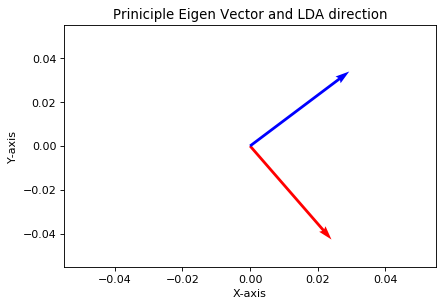

In [57]:
ucap = np.array(Ucap)[0]
Vector = eigenVector[:,0]           
V = np.array([ucap,Vector])
origin = [0], [0] # origin point
print(V)

plt.figure(dpi=80)
plt.title("Priniciple Eigen Vector and LDA direction")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.quiver(*origin, V[:,0], V[:,1], color=['r','b'], scale=3)
plt.show()

---

# LDA on a Binary-class dataset

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier # Used for checking the performance of LDA

In [116]:
dataset = np.genfromtxt("CheckerBoard_Dataset.csv",delimiter=',')
dataset.shape

(200, 3)

In [117]:
X , y = dataset[:,:-1], dataset[:,-1]
labels = np.unique(y)
print(labels)

[0. 1.]


In [118]:
X_p = np.array([X[i] for i in range(len(y)) if y[i]==labels[0]])
X_n = np.array([X[i] for i in range(len(y)) if y[i]==labels[1]])

In [119]:
print(X_p.shape,X_n.shape)

(100, 2) (100, 2)


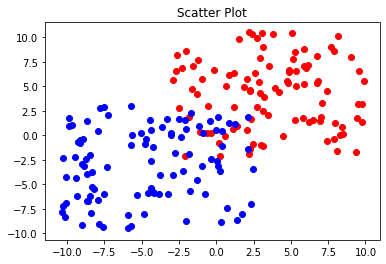

In [120]:
plt.figure()
plt.title("Scatter Plot")
plt.scatter(X_p[:,0],X_p[:,1],c='r')
plt.scatter(X_n[:,0],X_n[:,1],c='b')
plt.show()

In [121]:
# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [122]:
tree = DecisionTreeClassifier(criterion="entropy")
tree.fit(X_train,y_train)
accuracy = tree.score(X_test,y_test)
print("Accuracy",accuracy)

Accuracy 0.9333333333333333


In [123]:
LDA = LinearDiscriminantAnalysis(n_components=1) # model for reduction in 1D

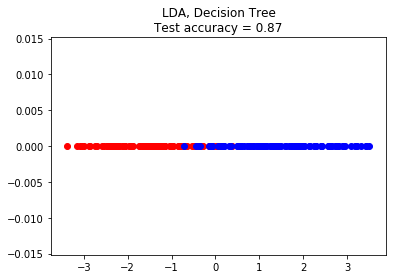

In [124]:
# Fit the method's model
LDA.fit(X_train, y_train)

# Fit a Decision Tree classifier on the embedded training set
tree.fit(LDA.transform(X_train), y_train)

# Compute the Decision Tree accuracy on the embedded test set
acc = tree.score(LDA.transform(X_test), y_test)
X_p_transformed = LDA.transform(X_p)
X_n_transformed = LDA.transform(X_n)
plt.figure()
plt.scatter(X_p_transformed,np.zeros(len(X_p_transformed)),c='r')
plt.scatter(X_n_transformed,np.zeros(len(X_n_transformed)),c='b')
plt.title("LDA, Decision Tree\nTest accuracy = {:.2f}".format(acc))
plt.show()

---

# LDA on a Multi-class Dataset(Iris)

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from mpl_toolkits import mplot3d

In [85]:
iris = datasets.load_iris() # iris data set
X = iris.data
y = iris.target
print(iris.keys())
features=iris.feature_names
target_names = iris.target_names
print(features)
print(target_names)
colors = ['navy', 'turquoise', 'darkorange']

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


## Ploting data in 3D

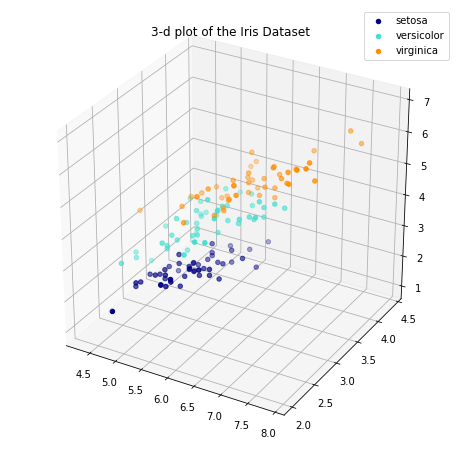

In [86]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.title("3-d plot of the Iris Dataset")
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    ax.scatter(X[y == i, 0], X[y == i, 1],X[y == i, 2], color = color,
                label = target_name)
plt.legend(loc='best')
plt.show()    

## Ploting different attribute of data to check which contribute more

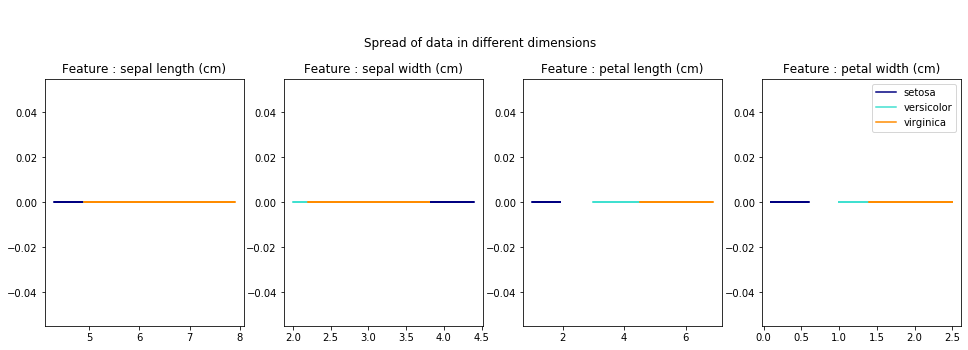

In [87]:
# Create figure
fig = plt.figure(figsize=(25, 10))
fig.suptitle("\n\nSpread of data in different dimensions" )

# Plot results
for j in range(4):
    ax = fig.add_subplot(2, 6, 2 + j + (j >3))
    for color, i, target_name in zip(colors, [0, 1, 2], target_names):
        ax.set_title("Feature : %s" %(features[j]))
        ax.plot(X[y == i, j],np.zeros_like(X[y == i, j]), color=color,label=target_name)
plt.legend(loc='best')
plt.show()

In [105]:
# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [106]:
# Use a Decision Tree classifier to evaluate the methods
tree = DecisionTreeClassifier(criterion='entropy')

In [107]:
tree.fit(X_train,y_train)
acc = tree.score(X_test,y_test)
print("Without LDA",acc)

Without LDA 0.9555555555555556


In [108]:
lda2 = LinearDiscriminantAnalysis(n_components=2) # model for reduction in 2D
lda1 = LinearDiscriminantAnalysis(n_components=1) # model for reduction in 1D

## Checking Accuracy after reducing data to 2D

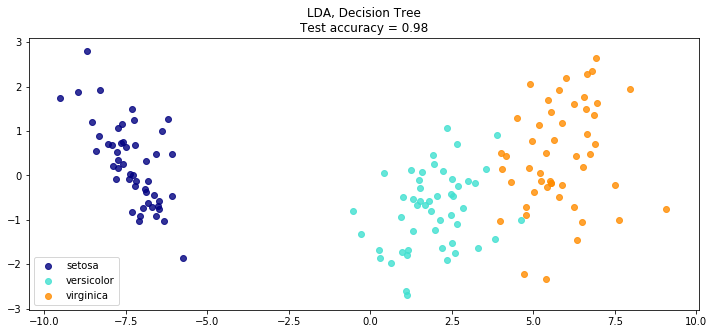

In [109]:
# Fit the method's model
lda2.fit(X_train, y_train)

# Fit a Decision Tree classifier on the embedded training set
tree.fit(lda2.transform(X_train), y_train)

# Compute the Decision Tree accuracy on the embedded test set
acc = tree.score(lda2.transform(X_test), y_test)
X_2 = lda2.transform(X)
plt.figure(figsize=(12,5))
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_2[y == i, 0], X_2[y == i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best')
plt.title("LDA, Decision Tree\nTest accuracy = {:.2f}".format(acc))
plt.show()

## Checking Accuracy after reducing data to 1D

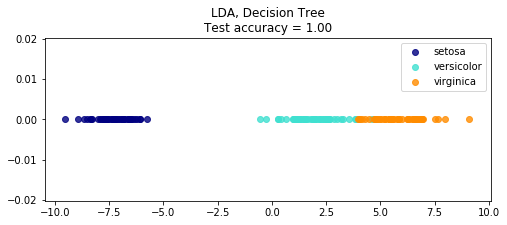

In [110]:
# Fit the method's model
lda1.fit(X_train, y_train)

# Fit a Decision Tree classifier on the embedded training set
tree.fit(lda1.transform(X_train), y_train)

# Compute the Decision Tree accuracy on the embedded test set
acc = tree.score(lda1.transform(X_test), y_test)
X_1 = lda1.transform(X)
plt.figure(figsize=(8,3))
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_1[y == i, 0],np.zeros_like(X[y == i, j]), alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best')
plt.title("LDA, Decision Tree\nTest accuracy = {:.2f}".format(acc))
plt.show()